# Lab 1 - Python fundamentals

In [ ]:
import matplotlib.pyplot as plt
def extract_clean_data(path):
    with open(path, "r") as file:
        text = file.read()

        #spliting the data and cleaning it
        texts = text.split(">seq")
        texts = [text.strip("1234567890\n").lower() for text in texts] # TODO:find a way to clean numbers better with \d (need re.sub)
        return texts
    
def sort_DNA_to_dicts(texts):
    dna_list = []
    for text in texts:
        
        #this is to exclude the first item of the list which is empty TDLR: did use chatgpt to find this problem and handle it
        if not text.strip(): #TODO: Find away to remove it in the cleaning part of the code
            continue
        sequence = dict(a = 0, t =0, c = 0, g = 0)
        for letter in text:
            if letter == "a":
                sequence["a"] += 1
            if letter == "t":
                sequence["t"] += 1
            if letter == "c":
                sequence["c"] += 1
            if letter == "g":
                sequence["g"] += 1
        dna_list.append(sequence)
    return dna_list

def plot_bar_chart(sequences):
    fig, ax = plt.subplots(len(sequences), figsize=(12,40))
    i = 0
    for sequence in sequences:
        ax[i].bar(*zip(*sequence.items()))
        ax[i].set(title=(f"DNA Sequence {i+1}"),xlabel=("DNA Letters"), ylabel=("Frequency"))
        i += 1

>seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
gaattcgcacca
AATAAAACCTCACCCAT
agagcccagaatttactcCCC
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca
gaattcgcacca
['', 'cgtaaccaataaaaaaacaagcttaacctaattc', 'agcttagtttggatctggccgggg', 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca\ngaattcgcacca\naataaaacctcacccat\nagagcccagaatttactcccc', 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca\ngaattcgcacca']
[{'a': 17, 't': 7, 'c': 8, 'g': 2}, {'a': 3, 't': 7, 'c': 4, 'g': 10}, {'a': 36, 't': 19, 'c': 34, 'g': 21}, {'a': 17, 't': 12, 'c': 15, 'g': 20}]


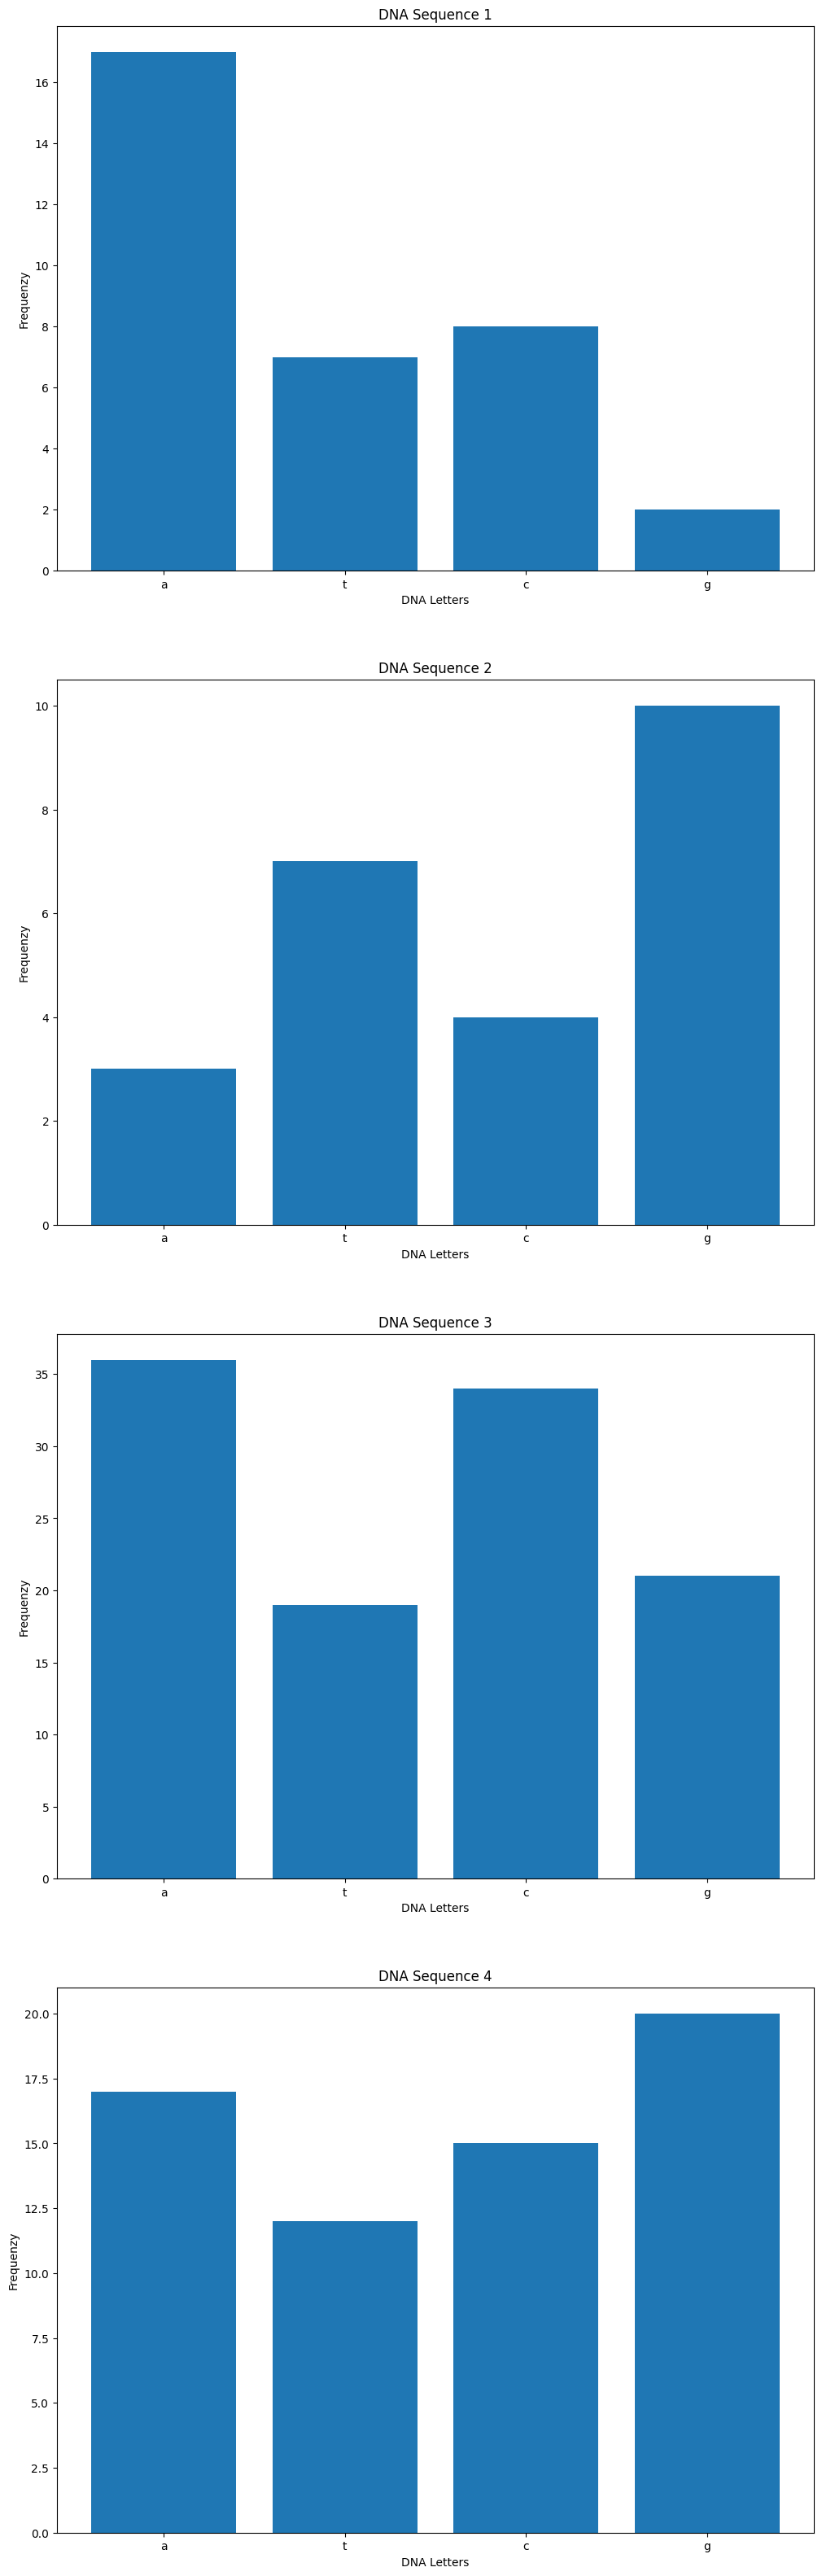

In [ ]:

data_path = "data"

path_dna = f"{data_path}/dna_raw.txt"
path_dna_complicated = f"{data_path}/dna_raw_complicated.txt"


dna_texts = extract_clean_data(path_dna_complicated)
dna_sequences = sort_DNA_to_dicts(dna_texts)
plot_bar_chart(dna_sequences)